##  ✈️ Flight Delay Prediction with Machine Learning  
## A Data-Driven Approach to Passenger Experience & Cost Optimization


### 1. Data Preparation
#### 1.1. Load and inspect datasets (flights, airlines, airports).
.

In [1]:
# 1.1 Load datasets
import pandas as pd

flights = pd.read_csv(r"flights.csv")
airlines = pd.read_csv(r"airlines.csv")
airports = pd.read_csv(r"airports.csv")

# Preview datasets
display(flights.head(), airlines.head(), airports.head())


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19140\693712961.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(r"flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


#### 1.2. Handle missing values and preprocess columns.

In [2]:
# 1.2 Cleaning and Preparing the Data

import pandas as pd

# Load datasets
flights = pd.read_csv("flights.csv")
airlines = pd.read_csv("airlines.csv")

# Remove rows with missing arrival or departure delays
flights = flights.dropna(subset=["ARRIVAL_DELAY", "DEPARTURE_DELAY"])

flights = flights.merge(
    airlines.rename(columns={"IATA_CODE": "AIRLINE_CODE", "AIRLINE": "AIRLINE_NAME"}),
    left_on="AIRLINE",
    right_on="AIRLINE_CODE",
    how="left"
)

flights = flights.drop(columns=["AIRLINE_CODE"])

flights = flights.reset_index(drop=True)

print(flights.head())
print(f"\nFinal shape of dataset: {flights.shape}")





C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19140\693303583.py:6: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("flights.csv")


   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_DELAY  \
0            ANC                 SEA                    5  ...          -22.0   
1            LAX                 PBI                   10  ...           -9.0   
2            SFO                 CLT                   20  ...            5.0   
3            LAX                 MIA                   20  ...           -9.0   
4            SEA                 ANC                   25  ...          -21.0   

   DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
0    

#### 1.3. Create target variable (DELAYED > 15 mins)

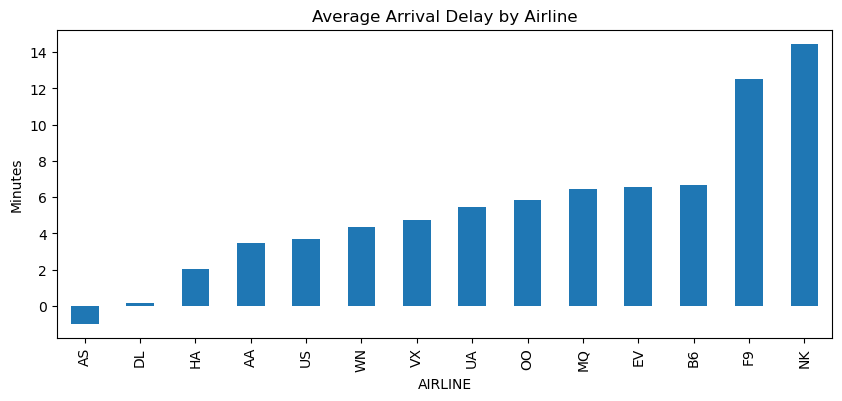

In [3]:
# 1.3 Explore delay patterns
import matplotlib.pyplot as plt

flights.groupby("AIRLINE")["ARRIVAL_DELAY"].mean().sort_values().plot.bar(figsize=(10,4))
plt.title("Average Arrival Delay by Airline")
plt.ylabel("Minutes")
plt.show()


#### Visual distribution of the departure and delays 

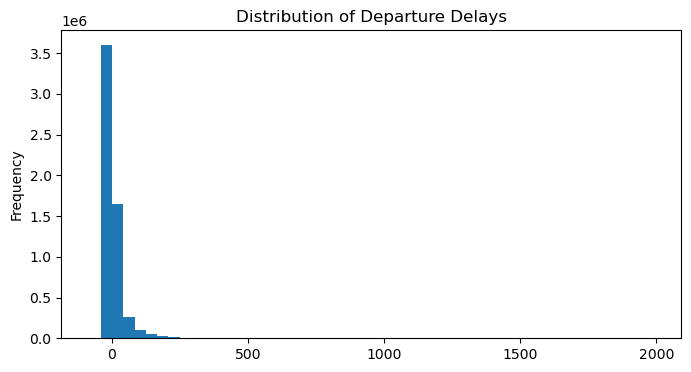

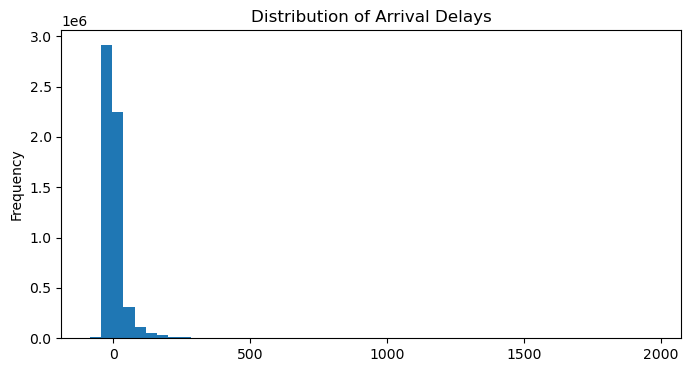

In [4]:
# 1.4 Visualize distributions
flights["DEPARTURE_DELAY"].plot.hist(bins=50, figsize=(8,4))
plt.title("Distribution of Departure Delays")
plt.show()

flights["ARRIVAL_DELAY"].plot.hist(bins=50, figsize=(8,4))
plt.title("Distribution of Arrival Delays")
plt.show()


## 2. Exploratory Data Analysis (EDA)
### 2.1. What is the overall distribution of flight delays?

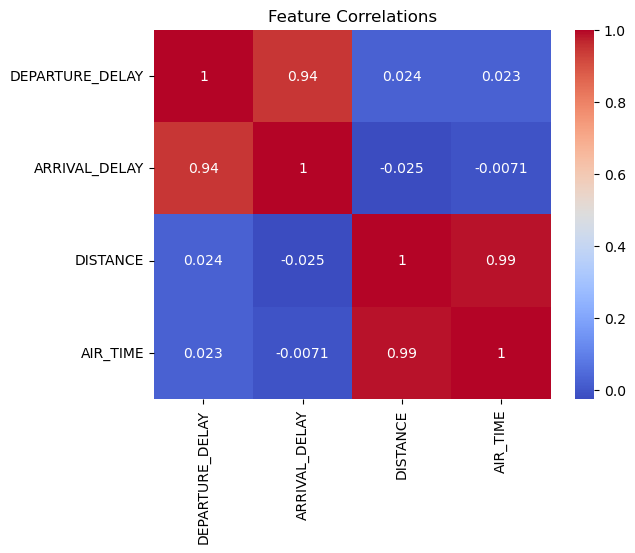

In [5]:
# 2.1 Correlation analysis
import seaborn as sns

num_cols = ["DEPARTURE_DELAY", "ARRIVAL_DELAY", "DISTANCE", "AIR_TIME"]
sns.heatmap(flights[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()


### 2.2. How do delays vary by month

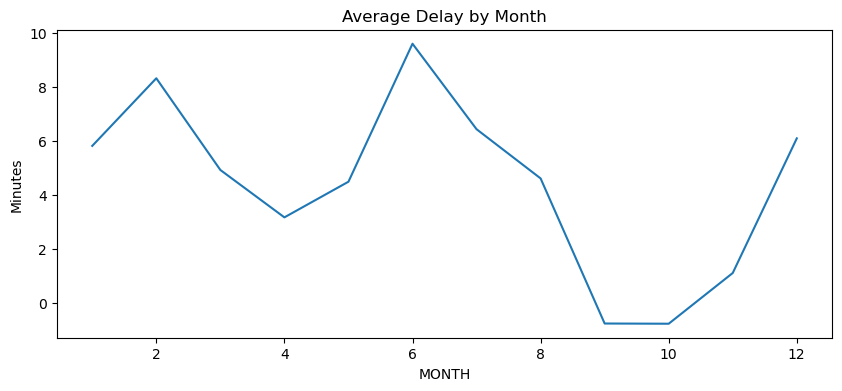

In [6]:
# 2.2 Time trends
flights.groupby("MONTH")["ARRIVAL_DELAY"].mean().plot(figsize=(10,4))
plt.title("Average Delay by Month")
plt.ylabel("Minutes")
plt.show()


### 2.3. Which features seem most correlated with delays?

In [7]:
# 2.3 Delay and Cancellation Reasons

import matplotlib.pyplot as plt

# Check if the column exists
if "CANCELLATION_REASON" in flights.columns:
    cancel_counts = flights["CANCELLATION_REASON"].dropna().value_counts()

    if not cancel_counts.empty:
        cancel_counts.plot.bar(figsize=(6,4))
        plt.title("Cancellation Reasons")
        plt.xlabel("Reason Code")
        plt.ylabel("Count")
        plt.show()
    else:
        print("⚠️ No cancellation reasons available in the dataset.")
else:
    print("⚠️ Column 'CANCELLATION_REASON' not found in dataset.")


⚠️ No cancellation reasons available in the dataset.


## 3. Machine Learning Model
### 3.1. Feature Selection + Target Creation


 Dataset Split Summary:


,Set,Rows,Columns
0,Training,70000,4
1,Testing,30000,4


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19140\1514952813.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_sample.value_counts().index,


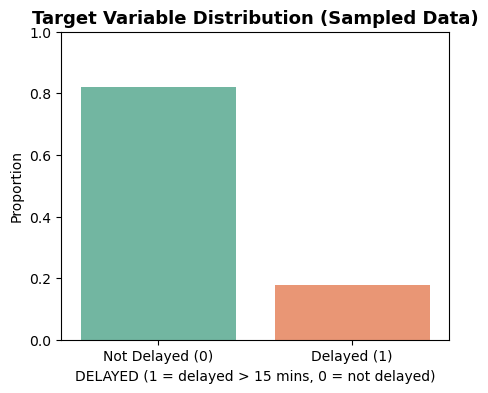

In [8]:
# 3.1 Feature Selection 

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Create target variable: 1 = delayed > 15 mins, 0 = if not
flights["DELAYED"] = (flights["ARRIVAL_DELAY"] > 15).astype(int)

features = ["DEPARTURE_DELAY", "DISTANCE", "AIR_TIME", "MONTH"]
X = flights[features]
y = flights["DELAYED"]

X_sample, y_sample = X.sample(n=100000, random_state=42), y.sample(n=100000, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample
)

summary = pd.DataFrame({
    "Set": ["Training", "Testing"],
    "Rows": [X_train.shape[0], X_test.shape[0]],
    "Columns": [X_train.shape[1], X_test.shape[1]]
})

print("\n Dataset Split Summary:")
display(
    summary.style.background_gradient(cmap="Greens")
           .format({"Rows": "{:.0f}", "Columns": "{:.0f}"})  # 
)


# Target distribution visualization
plt.figure(figsize=(5,4))
sns.barplot(x=y_sample.value_counts().index, 
            y=y_sample.value_counts(normalize=True).values, 
            palette="Set2")

plt.title("Target Variable Distribution (Sampled Data)", fontsize=13, weight="bold")
plt.xlabel("DELAYED (1 = delayed > 15 mins, 0 = not delayed)")
plt.ylabel("Proportion")
plt.xticks([0,1], ["Not Delayed (0)", "Delayed (1)"])
plt.ylim(0,1)
plt.show()



### 3.2. Train Logistic Regression model and evaluate performance

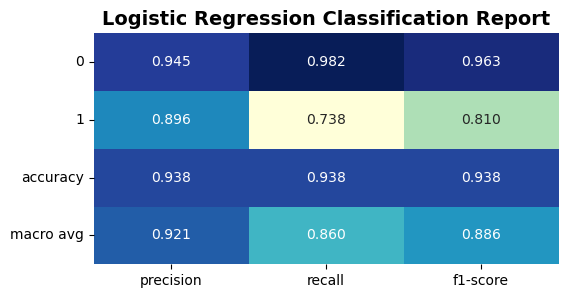

ROC AUC Score: 0.947
 Model saved as flight_delay_model.pkl


In [9]:
# 3.2 Train Logistic Regression model and evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver="lbfgs")
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # probability of "delayed"

# Generate classification report as dict
report_dict = classification_report(y_test, y_pred_log, output_dict=True)
report_df = pd.DataFrame(report_dict).T  # Convert to dataframe

report_df = report_df.round(3)

plt.figure(figsize=(6,3))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", cbar=False, fmt=".3f")
plt.title("Logistic Regression Classification Report", fontsize=14, weight="bold")
plt.yticks(rotation=0)
plt.show()

print("ROC AUC Score:", roc_auc_score(y_test, y_prob).round(3))


import joblib

joblib.dump(log_reg, "flight_delay_model.pkl")
print(" Model saved as flight_delay_model.pkl")


### 3.3. Train Random Forest model & visualize feature importance

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19140\3020109251.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


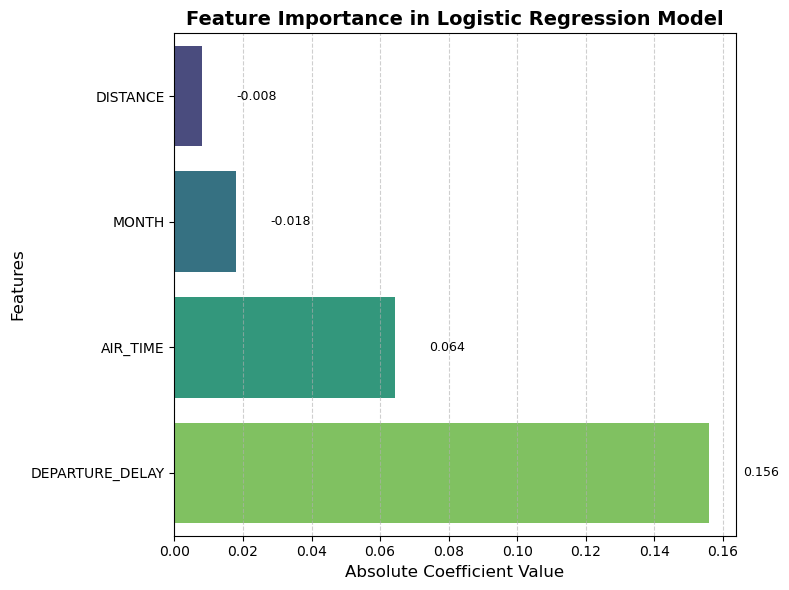

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get coefficients
coef = pd.Series(log_reg.coef_[0], index=features)

coef_sorted = coef.abs().sort_values(ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(
    x=coef_sorted.values,
    y=coef_sorted.index,
    palette="viridis"
)

for i, v in enumerate(coef_sorted.values):
    plt.text(v + 0.01, i, f"{coef[coef_sorted.index[i]]:.3f}", va="center", fontsize=9, color="black")

plt.title("Feature Importance in Logistic Regression Model", fontsize=14, weight="bold")
plt.xlabel("Absolute Coefficient Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()




## 4. Cost Simulation & Strategy Evaluation
### 4.1. How do we define cost functions for delay compensation

In [11]:
# 4.1 Define Costs and Compensation Strategies

import numpy as np

# Number of passengers 
n_passengers = 1000

# Compensation amounts 
comp_refund = 100    # refund cost 
comp_voucher = 50    # voucher cost 

# Use first n passengers' predicted probabilities of delay
predicted_probs = y_prob[:n_passengers]

# Define different airline strategies
def simulate_strategy(strategy):
    total_cost = 0
    for p in predicted_probs:
        if strategy == "A":
            # Strategy A: No compensation
            continue
        elif strategy == "B" and p > 0.3:
            # Strategy B: Refund if probability of >1 hr delay exceeds 30%
            total_cost += comp_refund
        elif strategy == "C" and p > 0.5:
            # Strategy C: Refund + voucher if probability of >2 hr delay exceeds 50%
            total_cost += (comp_refund + comp_voucher)
    return total_cost

print("Defined strategies and cost function successfully ✅")



Defined strategies and cost function successfully ✅


### 4.2. Compare multiple compensation strategies

In [12]:
strategies = {
    "A": "No Compensation",
    "B": "Refund if >1hr delay",
    "C": "Rebook + Voucher if >2hr delay"
}

print("\n--- Strategy Cost Comparison ---")
for key, val in strategies.items():
    cost = simulate_strategy(key)
    print(f"{val}: ${cost}")



--- Strategy Cost Comparison ---
No Compensation: $0
Refund if >1hr delay: $17700
Rebook + Voucher if >2hr delay: $21900


## 5. Conclusion & Insights

In [13]:
# 5.1 Enhanced Interactive Dashboard
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Sliders for parameters
refund_slider = widgets.IntSlider(value=100, min=50, max=200, step=10, description="Refund ($)")
voucher_slider = widgets.IntSlider(value=50, min=20, max=100, step=5, description="Voucher ($)")
passenger_slider = widgets.IntSlider(value=1000, min=500, max=5000, step=500, description="Passengers")

def update_dashboard(refund, voucher, passengers):
    global comp_refund, comp_voucher, n_passengers, predicted_probs
    comp_refund, comp_voucher, n_passengers = refund, voucher, passengers
    predicted_probs = y_prob[:n_passengers]
    
    # Simulate results
    results = {s: simulate_strategy(s) for s in strategies}
    strategy_names = list(strategies.values())
    costs = list(results.values())
    
    # Identify best and worst strategies
    min_strategy = strategy_names[np.argmin(costs)]
    max_strategy = strategy_names[np.argmax(costs)]
    
    # Bar Chart
    bar_fig = go.Figure(
        [go.Bar(
            x=strategy_names,
            y=costs,
            text=[f"${c}" for c in costs],
            textposition="auto",
            marker=dict(color=["#2ecc71", "#3498db", "#e74c3c"])  # green, blue, red
        )]
    )
    bar_fig.update_layout(
        title=f"Strategy Cost Simulation (Passengers: {passengers})",
        yaxis_title="Total Cost ($)",
        template="plotly_white"
    )
    
    # Pie Chart for cost 
    pie_fig = go.Figure(
        [go.Pie(labels=strategy_names, values=costs, hole=0.4,
                marker=dict(colors=["#2ecc71", "#3498db", "#e74c3c"]))]
    )
    pie_fig.update_layout(title="Cost Distribution Across Strategies")
    
    # Show outputs
    display(bar_fig)
    display(pie_fig)
    print(f"✅ Lowest cost strategy: {min_strategy}")
    print(f"❌ Highest cost strategy: {max_strategy}")
    print(f"💡 Cost difference: ${max(costs) - min(costs)}")

# Layout
ui = widgets.VBox([refund_slider, voucher_slider, passenger_slider])
out = widgets.interactive_output(update_dashboard, 
                                 {"refund": refund_slider, 
                                  "voucher": voucher_slider, 
                                  "passengers": passenger_slider})
display(ui, out)




Output()

##### 

#### This project analyzed historical flight data to understand patterns in delays across airlines, routes, and airports. Using exploratory data analysis, we identified trends, bottlenecks, and factors affecting flight punctuality. The findings offer actionable insights for airlines and airports to improve scheduling, reduce delays, and optimize operations. This work combines data analysis with practical business strategy.

## Streamlit UI

### Installing packages

In [14]:
%pip install streamlit joblib scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.


### Creating the Streamlit App file 

In [15]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

st.set_page_config(page_title="✈️ Flight Delay Predictor", layout="centered")
st.title("✈️ Flight Delay Predictor")

@st.cache_data
def load_data():
    df = pd.read_csv("flights.csv")  # your local CSV file
    return df

df = load_data()

st.subheader("Dataset Preview (first 100 rows only)")
st.dataframe(df.head(100))
st.write(f"Total rows: {df.shape[0]}, columns: {df.shape[1]}")

model = None
try:
    model = joblib.load("flight_delay_model.pkl")  # save this in the same folder
    st.success("✅ Loaded flight_delay_model.pkl")
except Exception as e:
    st.warning(f"Model not found or failed to load: {e}")

st.subheader("Single Flight Prediction")

if model is not None:
    airline = st.selectbox("Airline", df["AIRLINE"].unique())
    origin = st.selectbox("Origin Airport", df["ORIGIN_AIRPORT"].unique())
    destination = st.selectbox("Destination Airport", df["DESTINATION_AIRPORT"].unique())
    dep_time = st.number_input("Scheduled Departure (HHMM)", min_value=0, max_value=2359, value=900, step=1)
    day_of_week = st.slider("Day of Week (1=Mon, 7=Sun)", 1, 7, 3)

    input_df = pd.DataFrame({
        "Airline": [airline],
        "Origin": [origin],
        "Dest": [destination],
        "DepTime": [dep_time],
        "DayOfWeek": [day_of_week]
    })

    st.write("Input Preview:")
    st.table(input_df)

    if st.button("Predict This Flight"):
        try:

            prediction = model.predict(input_df)
            prob = model.predict_proba(input_df)[0][1]  # if classifier
            if prediction[0] == 1:
                st.error(f"🚨 Flight is likely DELAYED (Probability: {prob:.2f})")
            else:
                st.success(f"✅ Flight is likely ON TIME (Probability: {prob:.2f})")
        except Exception as e:
            st.error(f"Prediction failed: {e}")
else:
    st.info("No model loaded — single-flight prediction unavailable.")

st.subheader("Full-Dataset Batch Prediction")

if model is not None:
    if st.button("Run Prediction on Full Dataset"):
        try:
            df_copy = df.copy()
            # Apply preprocessing if needed
            # df_proc = preprocessor.transform(df_copy)
            df_copy["prediction"] = model.predict(df_copy)
            df_copy.to_csv("predicted_output.csv", index=False)
            st.success("✅ Predictions done! Saved as predicted_output.csv")
            st.download_button("Download Predictions CSV", "predicted_output.csv")
        except Exception as e:
            st.error(f"Prediction failed: {e}")
else:
    st.info("No model loaded — cannot run batch predictions.")


Overwriting app.py


In [16]:
import joblib
model = joblib.load("flight_delay_model.pkl")



In [17]:
import subprocess, sys, webbrowser, time, os

# command uses the same Python kernel executable so packages match
cmd = [sys.executable, "-m", "streamlit", "run", "app.py", "--server.port", "8501", "--server.headless", "true"]

# start streamlit in background; hide its stdout/stderr so notebook doesn't flood
proc = subprocess.Popen(cmd, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

# open browser to the default Streamlit URL
webbrowser.open("http://localhost:8501")

print("Streamlit started (PID:", proc.pid, "). If the page doesn't open automatically, go to http://localhost:8501")
# store process so you can stop it later in the same kernel
import builtins
builtins.streamlit_proc = proc


Streamlit started (PID: 12208 ). If the page doesn't open automatically, go to http://localhost:8501


In [10]:
proc.terminate()  
